# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

Import necessary libraries

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.stats.weightstats
import scipy.stats

In [62]:
df = pd.read_csv('human_body_temperature.csv')
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


### 1. Is the distribution of body temperatures normal?

Compare the distribution of the data to the theoretical distribution of the data. This is done by comparing the ecdf 

First define a function for computing the ecdf from a data set.

In [63]:
#define func to find ecdf of dataset
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    n = len(data)
    x = np.sort(data)
    y = np.arange(1, n+1) / n
    return x, y



Next use ```np.random.normal``` to sample the theoretical normal distribution and overlay the ecdf of both data sets to compare distribution.

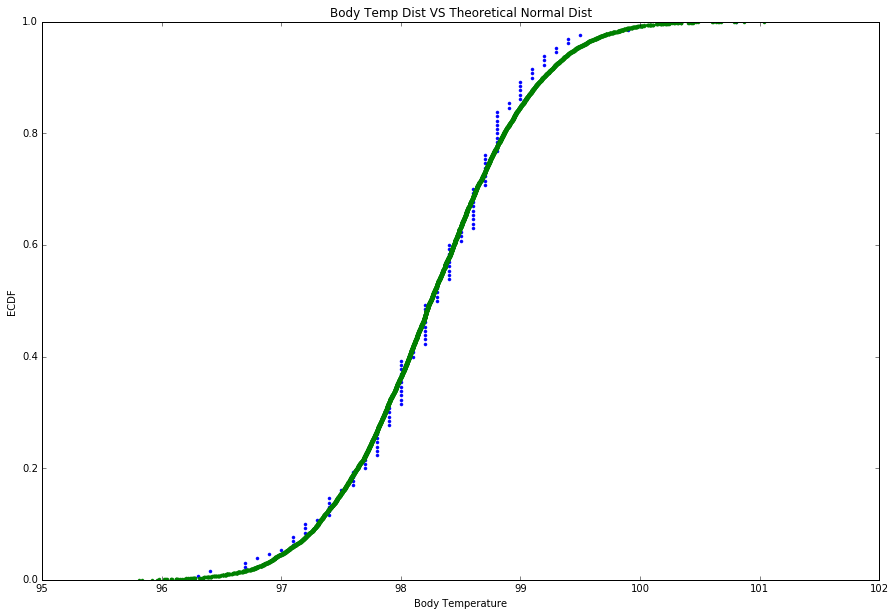

In [64]:
#set fig size
%matplotlib inline
plt.figure(figsize=(15,10))

#Sample data for theortical normal dist
samples = np.random.normal(np.mean(df.temperature), np.std(df.temperature), size=10000)

#find cdf of data
x_temp, y_temp = ecdf(df.temperature)
x_theor, y_theor = ecdf(samples)

plt.plot(x_temp, y_temp, marker='.', linestyle='none')
plt.plot(x_theor, y_theor, marker='.', linestyle='none')
plt.title('Body Temp Dist VS Theoretical Normal Dist')
plt.xlabel('Body Temperature')
plt.ylabel('ECDF')
plt.show()



The distribution of the body temperature appears to be approximately normally distrubited 

### 2. Is the sample size large? Are the observations independent?
By calling ```.info()``` on the dataframe, one can see that the dataframe contains 130 entries, a relatively large sample size. Additionally, by calling ```df.groupby(['gender']).count()```, we can see that even if divided by ```M``` and ```F``` the data is equally represented and therefore entries are independent of one another.

In [65]:
print(df.groupby(['gender']).count(), df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
temperature    130 non-null float64
gender         130 non-null object
heart_rate     130 non-null float64
dtypes: float64(2), object(1)
memory usage: 3.1+ KB
        temperature  heart_rate
gender                         
F                65          65
M                65          65 None


### 3. Is the true population mean really 98.6 degrees F?
#### Would you use a one-sample or two-sample test? Why?
For this situation, it would be appropriate to use a one-sample test, due to the fact that we only have one mean supported by a data set and the other is simply a reported me. Because of this, one would select a one-sample test.
#### In this situation, is it appropriate to use the ```t``` or ```z``` statistic?
In this situation, there is over 30 data points, so useing a ```z``` statistic would be more appropriate. Our null hypothesis would be that the true mean of our data set is 98.6. 


In [66]:
statsmodels.stats.weightstats.ztest(df.temperature, x2=None, value=98.6, alternative='smaller', usevar='pooled', ddof=1.0)

(-5.4548232923645195, 2.4510785070506077e-08)

Based on the results of the z-test, we would reject the null hypothesis, meaning that the mean of our dataset could likely not be derived by chance if the true mean was 98.6
#### Now try using the other test. How is the result be different? Why?

In [67]:
scipy.stats.ttest_1samp(df.temperature, 98.6, axis=0)

Ttest_1sampResult(statistic=-5.4548232923645195, pvalue=2.4106320415561276e-07)

While relatively similar, we receive `pvalue=2.4106320415561276e-07` which is actually a slightly larger pvalue that when using the z-test. This is because the z-test assumes the data is normally distributed, while the t-test does not.
#### Doing the test again with bootstrapping shows similar results.

In [68]:
#define a function to draw bootstrapped samples of the data
def draw_bs_samples(data, func, size=1):
    """define a function to draw bootstrapped samples of a 1-dimensional set of data, apply a function, 
        and return an array of a predetermined size"""
    bs_sample = np.empty(size)
    for i in range(size):
        bs_sample[i] = func(np.random.choice(data, size=len(data)))
    return bs_sample

p =  0.0


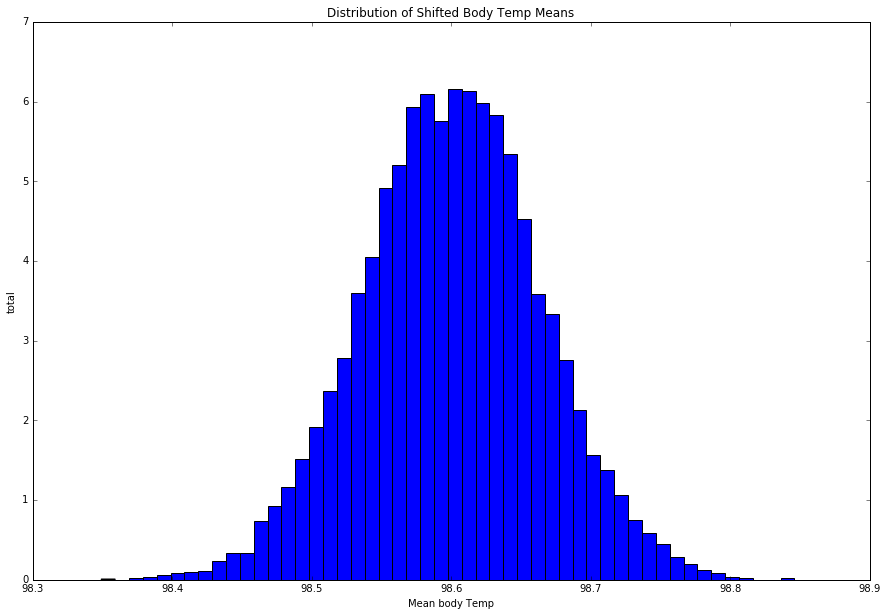

In [69]:
#set figure size
plt.figure(figsize=(15,10))

#shift the data to match the mean under the null hypothesis
temp_shifted = df.temperature - np.mean(df.temperature) + 98.6

#draw bootstrapped samples of the data
bs_means_shifted = draw_bs_samples(temp_shifted, np.mean, size=10000)

#calculate the p-value
p = np.sum(bs_means_shifted <= np.mean(df.temperature))/ len(bs_means_shifted)

print('p = ', p)
plt.hist(bs_means_shifted, bins=50, normed=True)
plt.title('Distribution of Shifted Body Temp Means')
plt.xlabel('Mean body Temp')
plt.ylabel('total')
plt.show()

Again, the p-value returned is so small it registers as zero, idicating that the null hypothesis should be rejected, and that observed mean of the data is in fact likely to be the actual mean.
### 4. Draw a small sample of size 10 from the data and repeat both tests.

In [70]:
#permutate the dataset
temp_sample = np.random.permutation(df.temperature)

temp_slice = temp_sample[:11]

z_test = statsmodels.stats.weightstats.ztest(temp_slice, x2=None, value=98.6, alternative='smaller', usevar='pooled', ddof=1.0)
t_test = scipy.stats.ttest_1samp(temp_slice, 98.6, axis=0)

print('z-test: ', z_test)
print('t_test: ', t_test)

z-test:  (-0.65550553010630797, 0.25607116353347636)
t_test:  Ttest_1sampResult(statistic=-0.65550553010630797, pvalue=0.52693430841522471)


#### Which one is the correct one to use?
In this situation where the sample size has been reduced to 10, the t-test would be the correct test to use. This is because the t-test does not assume normal distribution (which is much less likely with a small sample size).
#### What do you notice? What does this tell you about the difference in application of the  t and  z statistic?
Here we can see that the results of the t and z score are much lower, which would make rejecting the null hypothesis of that the mean is 98.6 much less likely to be false. more apparent are the difference in p-values, in which the z-score is `0.05614780361401573` (which would suggest we reject the null hypothesis) vs the t-score which was `0.14337939184305196` which would suggest that the null hypothesis is reasonably acceptable. This highlights how assuming normal distribution has a great impact on assumptions about probablity one can make about a data set.

### 5. At what temperature should we consider someone's temperature to be "abnormal"?
Start by computing the margin of error and confidence interval. 

In [71]:
confidence_int = scipy.stats.norm.interval(0.95, loc=np.mean(df.temperature), scale= np.std(df.temperature))

print('95% confidence interval: ', confidence_int)

95% confidence interval:  (96.81775582674824, 99.680705711713316)


Here it can be seen that confidence interaval is between 96.82 and 99.68 with a 5% margin of error. It is beyond these extremes that one might consider a temperature to be extreme. Using  bootstrapping, one can also check the 95th percentile for the mean of the samples out of 10,000 resamplings. 

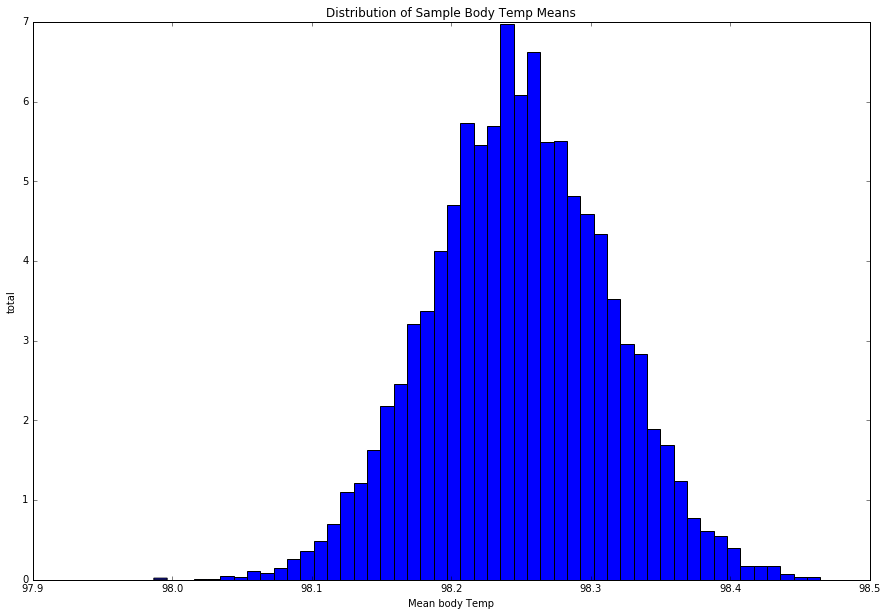

95th percentile: [ 98.12384615  98.37309615]


In [72]:
plt.figure(figsize=(15,10))

#resample means of the dataset
bs_means_temp = draw_bs_samples(df.temperature, np.mean, size=10000)

#compute the 95th percentile
percentile = np.percentile(bs_means_temp, [2.5, 97.5])

#plot the results of the resampling
plt.hist(bs_means_temp, bins=50, normed=True)
plt.title('Distribution of Sample Body Temp Means')
plt.xlabel('Mean body Temp')
plt.ylabel('total')
plt.show()

print('95th percentile: ' + str(percentile))

### 6. Is there a significant difference between males and females in normal temperature?
#### Write a story with your conclusion in the context of the original problem.
#### What test did you use and why? 
In this situation, there are now 2 seperate data sets of equal size. Since both samples are over 30 in size, picking a two-sample z-test seems obvious, but before choosing a test, visualization of the data will demonstrate any differences between the sets and their distributions. 


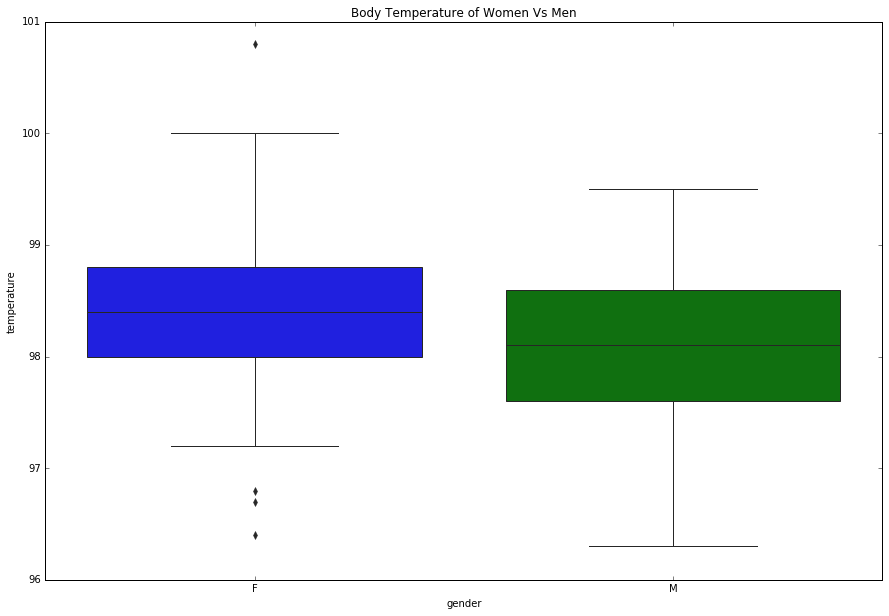

In [73]:
plt.figure(figsize=(15,10))

#plot the data of men and women 
sns.boxplot(x='gender', y='temperature', data=df)
plt.title('Body Temperature of Women Vs Men')
plt.show()

Apparent by this graph is a differnce in mean of the two genders, but the distribution is not clear. Plotting the ecdf will reveal the distributions better. 

In [80]:
#partition the data by m and f
men = df.loc[df['gender'] == 'M']
women = df.loc[df['gender'] == 'F']

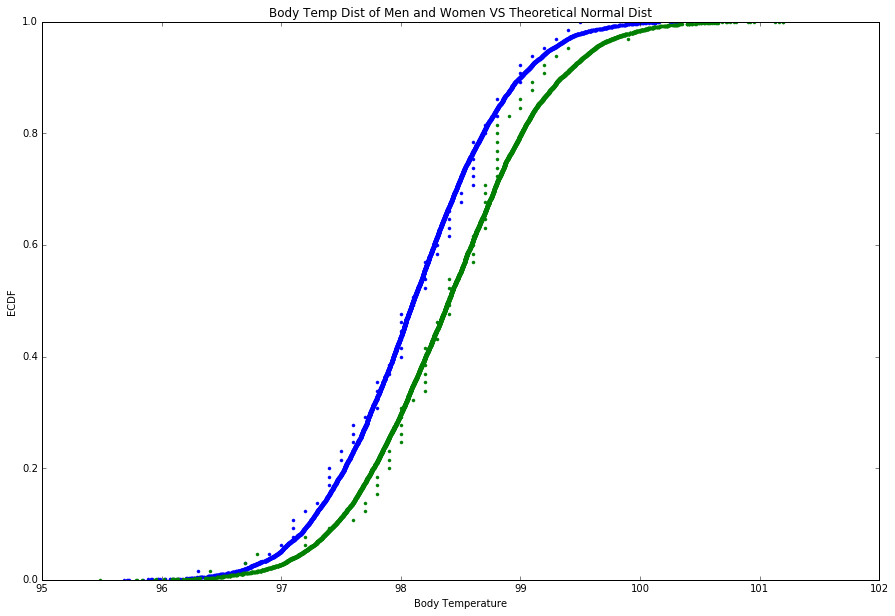

In [81]:
plt.figure(figsize=(15,10))

#resample the data assuming normal distribution
samples_men = np.random.normal(np.mean(men.temperature), np.std(men.temperature), size=10000)
samples_women = np.random.normal(np.mean(women.temperature), np.std(women.temperature), size=10000)

#define x, y, values of real and theortical data
x_men, y_men = ecdf(men.temperature)
x_women, y_women = ecdf(women.temperature)
x_normen, y_normen = ecdf(samples_men)
x_norw, y_norw = ecdf(samples_women)

#show plot
plt.plot(x_men, y_men, marker='.', linestyle='none')
plt.plot(x_women, y_women, marker='.', linestyle='none')
plt.plot(x_normen, y_normen, marker='.', linestyle='none', color='blue')
plt.plot(x_norw, y_norw, marker='.', linestyle='none', color='green')
plt.title('Body Temp Dist of Men and Women VS Theoretical Normal Dist')
plt.xlabel('Body Temperature')
plt.ylabel('ECDF')

plt.show()

Although data for men is more close to normal distribution than the data for women, they are both quite close to the normal distribution, so the assumption that the data is noramlly distributed will hold for performing a z-test. For this test, the assumption is that the means of male and female body temperatures are essentailly the same, and that their current difference is due to chance. 

In [90]:
z_test_mf = statsmodels.stats.weightstats.ztest(men.temperature, x2=women.temperature, value=0, alternative='two-sided', usevar='pooled', ddof=1.0)

print('z-score: ', z_test_mf)

z-score:  (-2.2854345381656103, 0.02228736076065755)


With a p-value of 0.02228736076065755, one can safely reject the null hypothesis and assume that the distributions of male and female body temperatures are statistically significantly different. Testing the null hypothesis with bootstrapping shows the same result. 

In [77]:
def diff_of_means(data_1, data_2):
    """Difference in means of two arrays."""

    # The difference of means of data_1, data_2: diff
    diff = np.mean(data_1) - np.mean(data_2)

    return diff



p-value = 0.0243


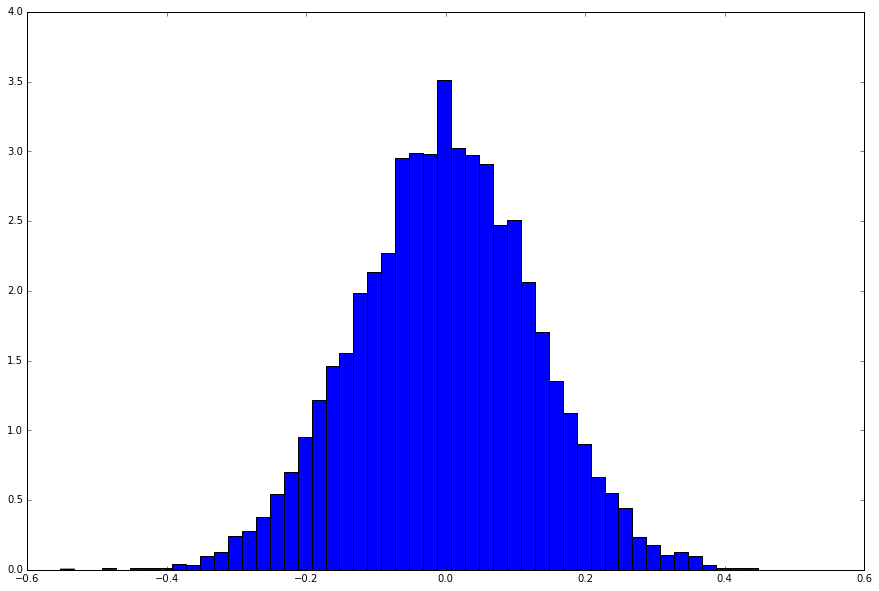

In [92]:
plt.figure(figsize=(15,10))

#compute the difference of means
diff = diff_of_means(men.temperature, women.temperature)

# Compute mean of all temperatures: mean_force
mean_temp = np.mean(df.temperature)

# Generate shifted arrays
temp_m_shifted = men.temperature - np.mean(men.temperature) + mean_temp
temp_f_shifted = women.temperature - np.mean(women.temperature) + mean_temp

# Compute 10,000 bootstrap replicates from shifted arrays
bs_replicates_m = draw_bs_samples(temp_m_shifted, np.mean, 10000)
bs_replicates_f = draw_bs_samples(temp_f_shifted, np.mean, 10000)

# Get replicates of difference of means: bs_replicates
bs_replicates = bs_replicates_m - bs_replicates_f

# Compute and print p-value: p
p = (np.sum(bs_replicates <= diff) +  np.sum(bs_replicates >= (diff * -1))) / 10000
print('p-value =', p)

plt.hist(bs_replicates, bins=50, normed=True)
plt.show()


In [99]:
#compute 95th percentile for f m mean temp
confidence_int_f = scipy.stats.norm.interval(0.95, loc=np.mean(women.temperature), scale= np.std(women.temperature))
confidence_int_m = scipy.stats.norm.interval(0.95, loc=np.mean(men.temperature), scale= np.std(men.temperature))

print('mean F body temperature: ', np.mean(women.temperature), ', 95th% confidence interval: ', confidence_int_f)
print('mean M body temperature: ', np.mean(men.temperature), ', 95th% confidence interval: ', confidence_int_m)
print('difference in mean body temp: ', diff)

mean F body temperature:  98.39384615384613 , 95th% confidence interval:  (96.947889684783718, 99.839802622908536)
mean M body temperature:  98.1046153846154 , 95th% confidence interval:  (96.745654983292113, 99.463575785938687)
difference in mean body temp:  -0.289230769230727


#### Conclusion
According to the tests, one can conclude with 98% probablity that women have a mean body temperature of 98.39 degress, which is 0.289 degrees higher than men, who have a mean body  temperature of 98.10.
